In [1]:
import pandas as pd
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


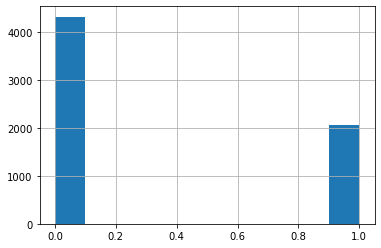

In [2]:
import numpy as np
from matplotlib import pyplot as plt
data['affair'].hist()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[data.columns.drop('affair')]
y = data['affair']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7319371727748691

In [5]:
predictions = model.predict_proba(X_test)[:, 1]
y_test = y_test.reset_index(drop=True)

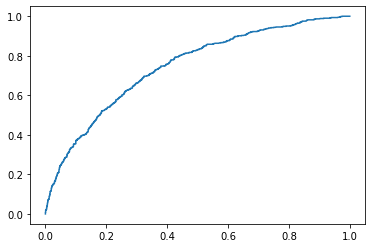

In [6]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
FPR, TPR, tresholds = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)

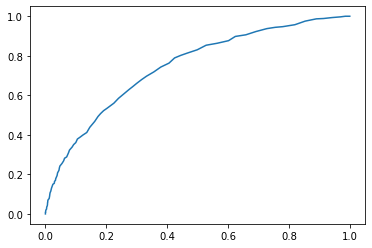

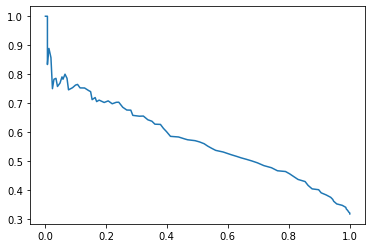

In [7]:
FPR_list = []
TPR_list = []
recall_list = []
precision_list = []

thresholds = np.linspace(0, 1, 100)

for ithresh in thresholds:
    y_pred = []
    
    for ipred in predictions:
        if ipred > ithresh:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    TP = 0
    FP = 0
    FN = 0
    TN = 0            

    for i in range(len(y_test)):
        if y_pred[i] == 1 and y_test[i] == 1:
            TP += 1
        if y_pred[i] == 1 and y_test[i] == 0:
            FP += 1
        if y_pred[i] == 0 and y_test[i] == 0:
            TN += 1
        if y_pred[i] == 0 and y_test[i] == 1:
            FN +=1
    
    try:
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        precision = TP / (TP + FP)
        recall = TPR
        
    except:
        pass
    
    TPR_list.append(TPR)
    FPR_list.append(FPR)
    precision_list.append(precision)
    recall_list.append(recall)
    
plt.plot(FPR_list, TPR_list)
plt.show()
plt.plot(recall_list, precision_list)